In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
#%matplotlib

In [12]:
# sample generator
def data (N = 5000):
    np.random.seed(154)  # for reproducibility
    M = [0., 0.]         # known expected values : E[x] = E[y] = 0
    Vx, Vy = 1.0, 4.0    # known variances : Var(x) = 1 ; Var(y) = 4
    r = np.random.uniform(0, 1)  # 'unknown' correlation (KEEP IT BLIND - DO NOT PRINTOUT)
    Cxy = r * math.sqrt(Vx * Vy)  # Covariance(x, y)
    COV = [[Vx, Cxy], [Cxy, Vy]]  # Covariance matrix
    XY = np.random.multivariate_normal(M, COV, size = N)  # data generator XY = {(x_i, y_i)}
    return XY, N

In [22]:
# Log likelihood
def LogL(params, data):  # -logLikelihood 2D correlated gaussian
    
    r = params[0]  # correlation parameter
    Vx, Vy = 1.0, 4.0  # variances (known: var(x) = 1 ; var(y) = 4)
    Cxy = r * math.sqrt(Vx * Vy)  # Covariance(x, y)
    COV = np.matrix([[Vx, Cxy], [Cxy, Vy]])  # Covariance matrix
    iCOV = np.linalg.inv(COV)  # inverted covariance matrix
    LL = 0
    
    for xy in data:
        x = xy[0]
        y = xy[1]
        dmu = np.matrix([x, y])
        chi2 = dmu.dot(iCOV.dot(dmu.T))
        LL += 0.5 * chi2[0, 0] + math.log(math.sqrt(1 - r * r))
    
    return LL

In [23]:
XY, N = data()  # generate the sample with an unknown correlation

In [24]:
print(XY)
print(N)

[[ 1.69670676  2.63758547]
 [ 0.97681916  0.87181651]
 [ 0.89727048  2.07568048]
 ...
 [-0.82187748 -2.51671312]
 [ 0.37899759  2.21654908]
 [-0.9428099  -0.42198529]]
5000


In [25]:
fitres = sp.optimize.minimize(LogL, [0.], args=XY, method='Nelder-Mead',bounds=[(-0.999, 0.999)])

In [26]:
print(fitres)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4198.785596025112
             x: [ 5.131e-01]
           nit: 23
          nfev: 46
 final_simplex: (array([[ 5.131e-01],
                       [ 5.131e-01]]), array([ 4.199e+03,  4.199e+03]))


In [ ]:
# x = [5.131e-01]

In [30]:
LogL([5.131e-01], XY)

4198.785598388547

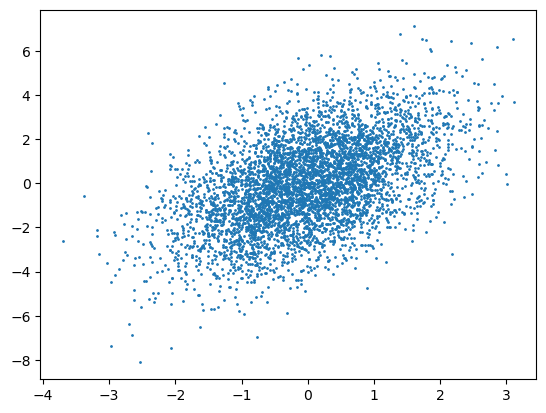

In [35]:
plt.scatter(x=XY[:, 0], y = XY[:, 1], s = 1)

In [87]:
rho = np.linspace(-0.999, 0.999, 500)
Y = [(LogL([r], XY) - fitres.fun) for r in rho]
#print(rho)
print(len(rho))
print(len(Y))

500
500


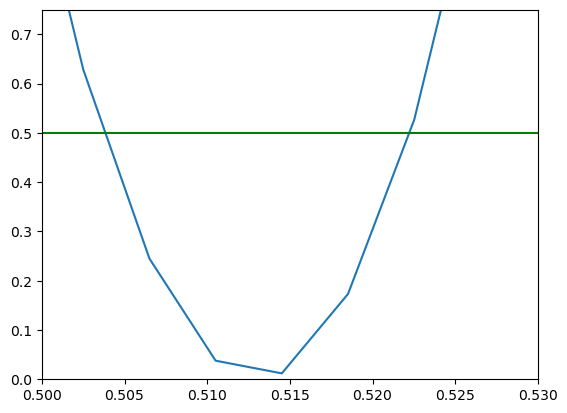

In [91]:
#print(Y)

plt.plot(rho, Y);
plt.ylim(0, 0.75);
plt.xlim(0.5, 0.53);
plt.hlines(y = 0.5, xmin = -1, xmax = 1, color="green");
#plt.vlines(x = 0.5095, ymin= 0, ymax = 0.75, color="red");
#plt.vlines(x = 0.5181, ymin= 0, ymax = 0.75, color="red")